# Final Project - Analyzing Bike Share Data

In this project, we plan to analyze the SF Bay Area Bike Share dataset. The dataset has information on bikes, stations, weather, and bike trips. The goal is to use techniques learnt in the class to better understand the dataset. We plan to use techniques like clustering, regression, visualization, and dimensionality reduction.

## Dataset Description

The Bay Area Bike Share enables quick, easy, and affordable bike trips around the San Francisco Bay Area. They make regular open data releases (this dataset is a transformed version of the data from this link), plus maintain a real-time API.


- station.csv - Contains data that represents a station where users can pickup or return bikes.

- status.csv - data about the number of bikes and docks available for given station and minute.

- trips.csv - Data about individual bike trips

- weather.csv - Data about the weather on a specific day for certain zip codes

#### Here, since the downloaded dataset is in the sqlite form, we will read the dataset from the database and then store the dataset in csv format.

In [2]:
import seaborn as sb
import numpy as np
import pandas as pd

In [3]:
# Reading the dataset from the database downloaded from source

import sqlite3
import pandas as pd

# Create your connection.
cnx = sqlite3.connect('/Users/stavanpatel/Downloads/database.sqlite')

df_station = pd.read_sql_query("SELECT * FROM station", cnx)
df_status = pd.read_sql_query("SELECT * FROM status", cnx)
df_trip = pd.read_sql_query("SELECT * FROM trip", cnx)
df_weather = pd.read_sql_query("SELECT * FROM weather", cnx)
cnx.close()

OperationalError: unable to open database file

In [ ]:
df_status.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


Here, we are loading the data read from the sqlite database to csv files, so that it can be easier later on.

In [ ]:
# df_station.to_csv('../data/station.csv', index=False)
# df_status.to_csv('../data/status.csv', index=False)
# df_trip.to_csv('../data/trip.csv', index=False)
# df_weather.to_csv('../data/weather.csv', index=False)

# Data Exploration

In [4]:
df_station = pd.read_csv('../data/station.csv')
df_status = pd.read_csv('../data/status.csv')
df_trip = pd.read_csv('../data/trip.csv')
df_weather = pd.read_csv('../data/weather.csv')

In [ ]:
df_station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [ ]:
df_status.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [ ]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [ ]:
df_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


### Now that we have the data properly loaded, we will try to explore the data we have.

In [ ]:
df_station.count

<bound method DataFrame.count of     id                               name        lat        long  dock_count  \
0    2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1    3              San Jose Civic Center  37.330698 -121.888979          15   
2    4             Santa Clara at Almaden  37.333988 -121.894902          11   
3    5                   Adobe on Almaden  37.331415 -121.893200          19   
4    6                   San Pedro Square  37.336721 -121.894074          15   
..  ..                                ...        ...         ...         ...   
65  77                  Market at Sansome  37.789625 -122.400811          27   
66  80    Santa Clara County Civic Center  37.352601 -121.905733          15   
67  82          Broadway St at Battery St  37.798541 -122.400862          15   
68  83                         Mezes Park  37.491269 -122.236234          15   
69  84                        Ryland Park  37.342725 -121.895617          15   

      

In [ ]:
df_status.count

<bound method DataFrame.count of           station_id  bikes_available  docks_available                 time
0                  2                2               25  2013/08/29 12:06:01
1                  2                2               25  2013/08/29 12:07:01
2                  2                2               25  2013/08/29 12:08:01
3                  2                2               25  2013/08/29 12:09:01
4                  2                2               25  2013/08/29 12:10:01
...              ...              ...              ...                  ...
71984429          84                8                7  2015-08-31 23:55:02
71984430          84                8                7  2015-08-31 23:56:01
71984431          84                8                7  2015-08-31 23:57:02
71984432          84                8                7  2015-08-31 23:58:02
71984433          84                8                7  2015-08-31 23:59:02

[71984434 rows x 4 columns]>

In [5]:
# Plot null values for all the datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_null(df):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()
    

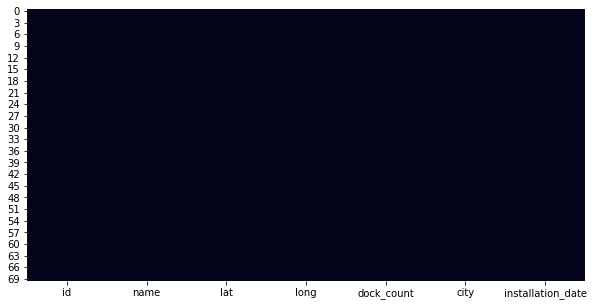

In [6]:
plot_null(df_station)
# plot_null(df_status)
# plot_null(df_trip)
# plot_null(df_weather)


In [2]:
df_trip.head()

NameError: name 'df_trip' is not defined

In [17]:
df_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


#### Figuring out the null values

In [18]:
df_station.isnull().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

In [19]:
df_status.isnull().sum()

station_id         0
bikes_available    0
docks_available    0
time               0
dtype: int64

In [20]:
df_trip.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [21]:
df_weather.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

#### The dataframes 'status' and 'station' don't seem to have any null values. But the dfs 'weather' and 'trip' have some null values.

# Now we will perform Exploration of the data in their individual notebooks.